In [ ]:
import kagglehub
path = kagglehub.dataset_download('nikhil25803/github-dataset')
print(path)

100%|██████████| 75.7M/75.7M [00:02<00:00, 32.5MB/s]

Extracting files...


/root/.cache/kagglehub/datasets/nikhil25803/github-dataset/versions/2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/nikhil25803/github-dataset/versions/2/github_dataset.csv')

In [ ]:
df.head()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,NaN
1,EddieHubCommunity/support,271,150,536,6,71,NaN
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby


In [ ]:
df.shape

(1052, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   repositories   1052 non-null   object
 1   stars_count    1052 non-null   int64 
 2   forks_count    1052 non-null   int64 
 3   issues_count   1052 non-null   int64 
 4   pull_requests  1052 non-null   int64 
 5   contributors   1052 non-null   int64 
 6   language       907 non-null    object
dtypes: int64(5), object(2)
memory usage: 57.7+ KB


In [ ]:
df.language.isnull().value_counts()

,count
language,
False,907
True,145


In [ ]:
df.language = df.language.fillna('No specified language')
df.head()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,No specified language
1,EddieHubCommunity/support,271,150,536,6,71,No specified language
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby


In [ ]:
df['repository_name'] = df.repositories.str.split('/').str[1]
df['repository_name']

,repository_name
0,Hello-World
1,support
2,aleth
3,localstack
4,classroom
...,...
1047,canvas-astar.dart
1048,github-slideshow
1049,interactive_cpu_scheduler
1050,voting_dapp


In [ ]:
df['user_name'] = df.repositories.str.split('/').str[0]
df['user_name']

,user_name
0,octocat
1,EddieHubCommunity
2,ethereum
3,localstack
4,education
...,...
1047,Tyriar
1048,ankitkumar70777
1049,aitikgupta
1050,gwmccubbin


In [ ]:
df

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language,repository_name,user_name
0,octocat/Hello-World,0,0,612,316,2,No specified language,Hello-World,octocat
1,EddieHubCommunity/support,271,150,536,6,71,No specified language,support,EddieHubCommunity
2,ethereum/aleth,0,0,313,27,154,C++,aleth,ethereum
3,localstack/localstack,0,0,290,30,434,Python,localstack,localstack
4,education/classroom,0,589,202,22,67,Ruby,classroom,education
...,...,...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1,1,0,0,Dart,canvas-astar.dart,Tyriar
1048,ankitkumar70777/github-slideshow,0,0,1,0,8,HTML,github-slideshow,ankitkumar70777
1049,aitikgupta/interactive_cpu_scheduler,0,5,1,1,7,Python,interactive_cpu_scheduler,aitikgupta
1050,gwmccubbin/voting_dapp,11,5,1,0,0,JavaScript,voting_dapp,gwmccubbin


In [ ]:
df = df.drop(['repositories'], axis=1)

In [ ]:
df

,stars_count,forks_count,issues_count,pull_requests,contributors,language,repository_name,user_name
0,0,0,612,316,2,No specified language,Hello-World,octocat
1,271,150,536,6,71,No specified language,support,EddieHubCommunity
2,0,0,313,27,154,C++,aleth,ethereum
3,0,0,290,30,434,Python,localstack,localstack
4,0,589,202,22,67,Ruby,classroom,education
...,...,...,...,...,...,...,...,...
1047,2,1,1,0,0,Dart,canvas-astar.dart,Tyriar
1048,0,0,1,0,8,HTML,github-slideshow,ankitkumar70777
1049,0,5,1,1,7,Python,interactive_cpu_scheduler,aitikgupta
1050,11,5,1,0,0,JavaScript,voting_dapp,gwmccubbin


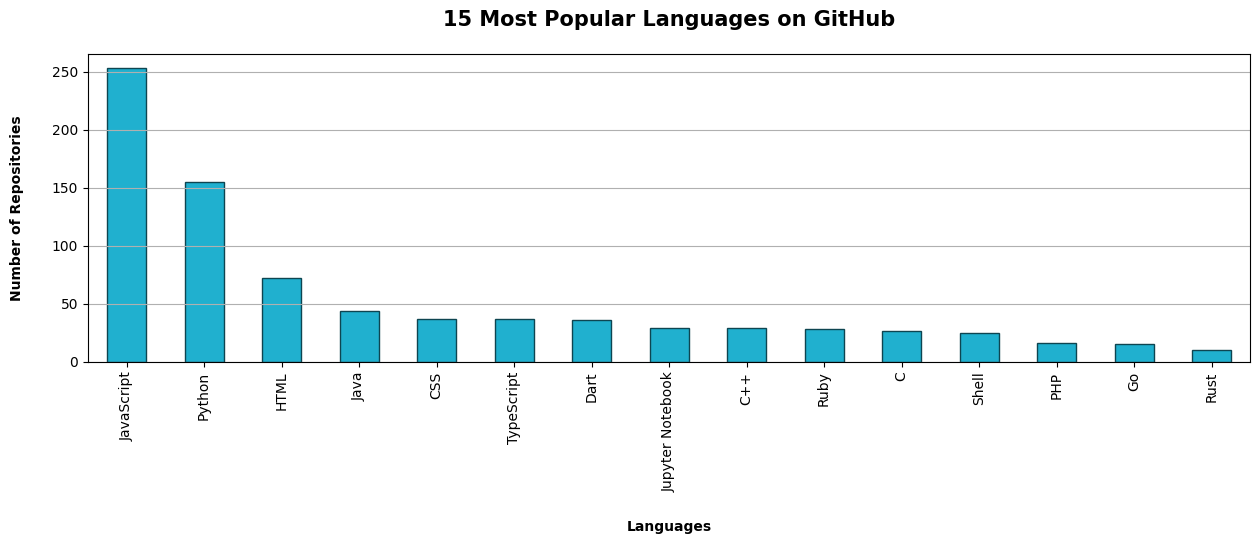

In [ ]:
lang = df.loc[df.language != 'No specified language']
lang.language.value_counts()[:15].plot(kind = 'bar', figsize = (15,4), color = '#20b0cf', edgecolor = '#0e4551')
plt.xlabel('Languages', fontweight = 'bold', labelpad = 20)
plt.ylabel('Number of Repositories', fontweight = 'bold', labelpad = 20)
plt.title('15 Most Popular Languages on GitHub', fontweight = 'bold', fontsize = 15, pad = 20)
plt.grid(axis = 'y')
plt.show()

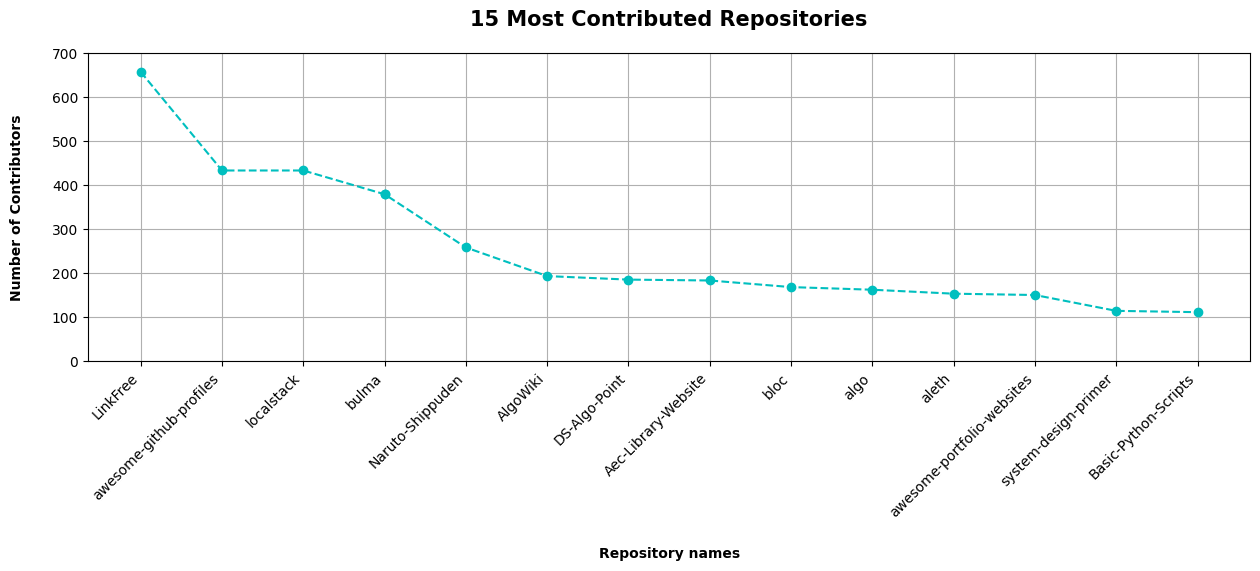

In [ ]:
top_contri = df.sort_values(by = 'contributors', ascending= False)[:15]
plt.figure(figsize =  (15, 4))
plt.plot(top_contri.repository_name, top_contri.contributors, 'c--o')
plt.xlabel('Repository names', fontweight = 'bold', labelpad = 20)
plt.ylabel('Number of Contributors', fontweight = 'bold', labelpad = 20)
plt.xticks(rotation = 45, ha = 'right')
plt.yticks([0, 100, 200, 300, 400, 500, 600, 700])
plt.title('15 Most Contributed Repositories', fontweight = 'bold', pad = 20, fontsize = 15)
plt.grid()
plt.show()

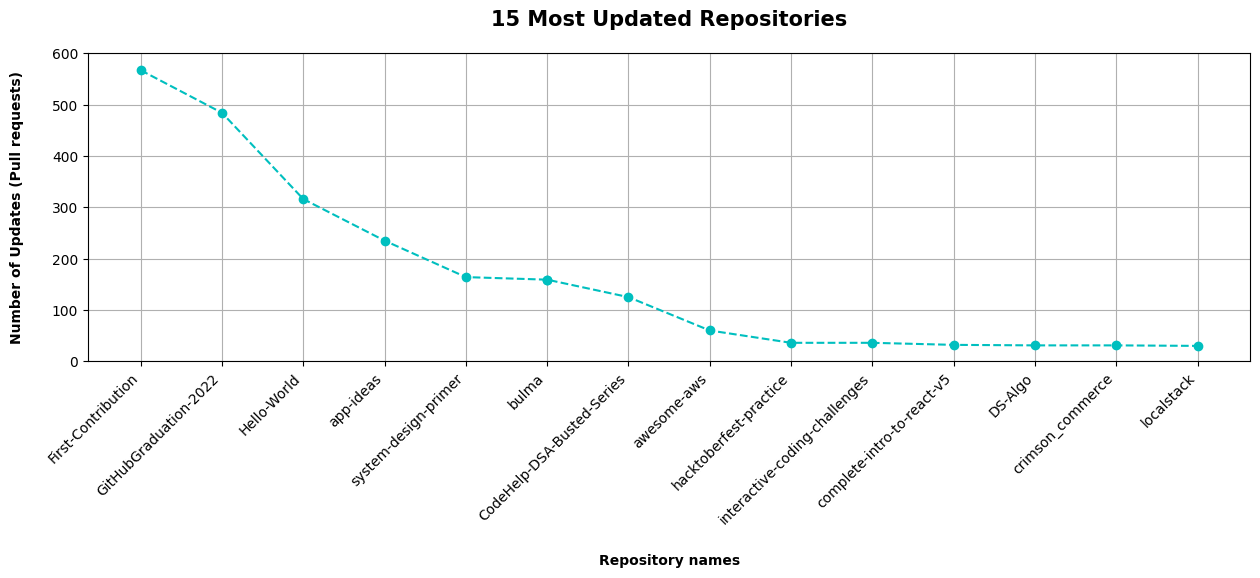

In [ ]:
top_updates = df.sort_values(by = 'pull_requests', ascending= False)[:15]
plt.figure(figsize =  (15, 4))
plt.plot(top_updates.repository_name, top_updates.pull_requests, 'c--o')
plt.xlabel('Repository names', fontweight = 'bold', labelpad = 20)
plt.ylabel('Number of Updates (Pull requests)', fontweight = 'bold', labelpad = 20)
plt.xticks(rotation = 45, ha = 'right')
plt.yticks([0, 100, 200, 300, 400, 500, 600])
plt.title('15 Most Updated Repositories', fontweight = 'bold', pad = 20, fontsize = 15)
plt.grid()
plt.show()

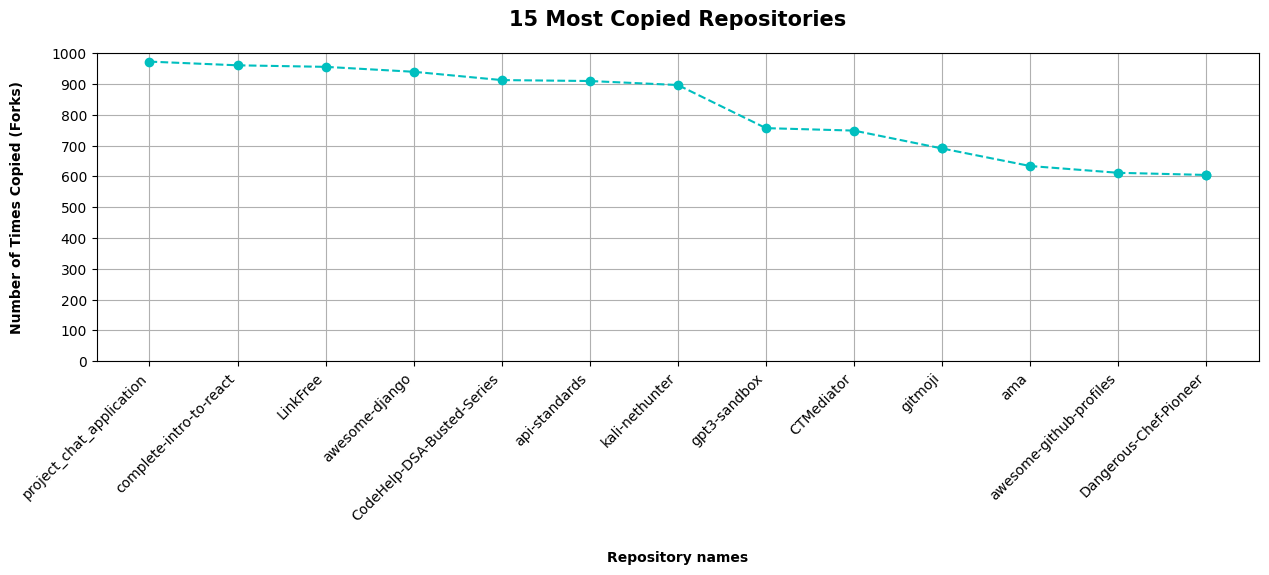

In [ ]:
top_forked = df.sort_values(by = 'forks_count', ascending= False)[:15]
plt.figure(figsize =  (15, 4))
plt.plot(top_forked.repository_name, top_forked.forks_count, 'c--o')
plt.xlabel('Repository names', fontweight = 'bold', labelpad = 20)
plt.ylabel('Number of Times Copied (Forks)', fontweight = 'bold', labelpad = 20)
plt.xticks(rotation = 45, ha = 'right')
plt.yticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
plt.title('15 Most Copied Repositories', fontweight = 'bold', pad = 20, fontsize = 15)
plt.grid()
plt.show()